## Q2:Alternative Oracle using Phase Kickback: Replace the standard CNOT-based oracle with a phase oracle. Show that this “phase kickback” version yields the same measured result bits as the original (i.e. the secret string) after the final Hadamards. This tests the understanding of different oracles constructions that encode svia phase instead of X-flips. Write your views on how this phase oracle will be beneficial as compared to the previous one(CNOT’s one).

## Key Concept: Phase Kickback

### Instead of using a CNOT gate to flip a target qubit conditionally, the phase oracle modifies the global phase of the state based on the value of fs(x) = s⋅x mod 2
### This is done by applying Z (or more generally, Rz(π)) only when a bit in s is 1, but we do not use any ancillary qubit. The interference pattern created during Hadamard transformation still encodes the hidden string.

In [49]:
# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import *
import matplotlib.pyplot as plt

# Function to implement the Bernstein-Vazirani circuit
def bernstein_vazirani(s: str):
    n = len(s)  # Number of qubits

    # Step 1: Initialize registers
    # We need n qubits for the input register and one ancillary qubit for the oracle.
    # We also need n classical bits to store the measurement results.
    # The qubits are automatically initialized to the state |0⟩.
    
    qc = QuantumCircuit(n + 1, n)

    # Step 2
    # Apply Hadamard gates to all input qubits
    # This puts the input register into a superposition of all possible states.
    qc.h(range(n))
    
    qc.barrier() # Add a barrier for visual clarity
    
   # Step 3: Apply the phase oracle U_f - using Z gates (phase kickback)
    # The oracle flips the phase of the states |x⟩ and this is done only when a bit in s is 1
    # It applies a Rz(π)) for each '1' in the secret_string.
    # We iterate through the secret string in reverse because Qiskit orders qubits from right to left (q0, q1, ...).
    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.z(i) # Apply  Rz(π)) from data qubit i

    qc.barrier() # for visual separation

    # Step 4: Apply Hadamard gates again to the input qubits
    # This interferes the states to isolate the secret string 's'.
    qc.h(range(n))

    # Step 5: Measure the first n qubits
    # Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc

# Hidden bit string (e.g., s = '1011')
s = '1011'
qc = bernstein_vazirani(s)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
#compiled_circuit = transpile(qc, simulator)
#result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Find the most frequent outcome
measured_string = max(counts, key=counts.get)
if measured_string == s:
    print("\nSuccess! The measured string matches the secret string.")
else:
    print("\nFailure! The measured string does not match.")
    
# Display results
print(f"Measured bitstring (should be {s}):")
print(counts)




Success! The measured string matches the secret string.
Measured bitstring (should be 1011):
{'1011': 1024}


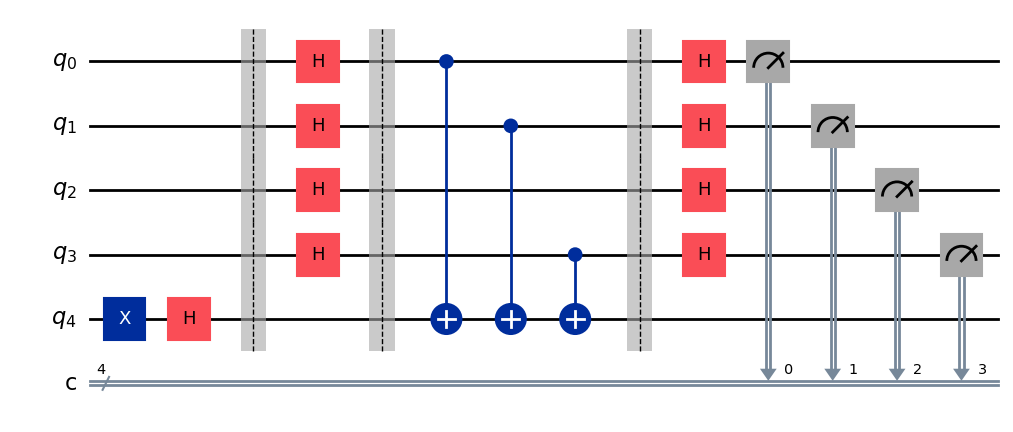

In [51]:
qc.draw('mpl')


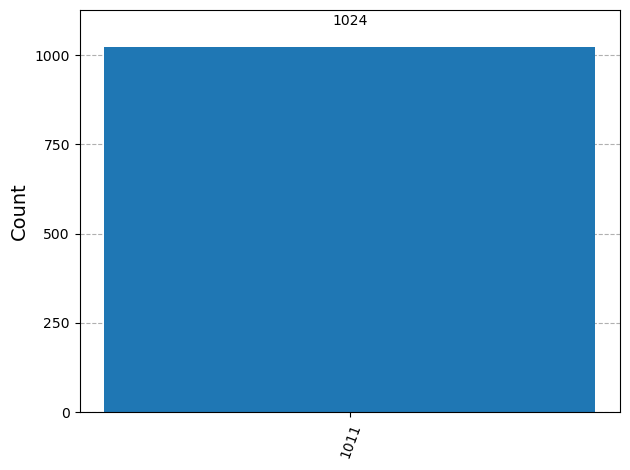

In [32]:
plot_histogram(counts)


In [34]:
plt.show()